<a href="https://colab.research.google.com/github/MeSamiulIslam/BA_Assessment12/blob/Master/exrc_01_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries:
I import the necessary libraries - pandas for data manipulation, numpy for numerical operations, and matplotlib for plotting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Data:
Read the CSV file from the provided URL using pd.read_csv() and store it in a DataFrame named df.

In [2]:
# Read the CSV file
url= "https://raw.githubusercontent.com/MeSamiulIslam/BA_Assessment12/Master/weather_2020-11.csv"
df = pd.read_csv(url)

# Data Exploration:
* Display the first 5 rows of the DataFrame
using df.head(5) to check the structure of the data.

In [3]:
df.head(5)

,Time,ParameterName,ParameterValue
0,2020-11-01T00:00:00Z,TA_PT1H_AVG,6.5
1,2020-11-01T00:00:00Z,TA_PT1H_MAX,6.6
2,2020-11-01T00:00:00Z,TA_PT1H_MIN,6.3
3,2020-11-01T00:00:00Z,RH_PT1H_AVG,95.0
4,2020-11-01T00:00:00Z,WS_PT1H_AVG,3.3



* Check the data types of each column using df.dtypes to ensure they are correctly interpreted.

In [4]:
# Check the data types of each column
print(df.dtypes)

Time              object
ParameterName     object
ParameterValue    object
dtype: object



* Print the column names using df.columns to verify the column names.

In [5]:
print(df.columns)

Index(['Time', 'ParameterName', 'ParameterValue'], dtype='object')



* We strip leading and trailing whitespaces from column names using df.columns.str.strip() to prevent any inconsistencies.

In [6]:
# Strip leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Check the column names again
print(df.columns)

Index(['Time', 'ParameterName', 'ParameterValue'], dtype='object')



* We print unique values in the "ParameterName" column to understand the parameters available in the dataset.

In [7]:
# Get unique values in the "ParameterName" column
unique_parameters = df["ParameterName"].unique()

In [8]:
# Print unique values
print("Unique Parameter Names:")
for parameter in unique_parameters:
    print(parameter)

Unique Parameter Names:
TA_PT1H_AVG
TA_PT1H_MAX
TA_PT1H_MIN
RH_PT1H_AVG
WS_PT1H_AVG
WS_PT1H_MAX
WS_PT1H_MIN
WD_PT1H_AVG
PRA_PT1H_ACC
PRI_PT1H_MAX
PA_PT1H_AVG
WAWA_PT1H_RANK


# Data Cleaning:
* Filter out rows with NaN and non-numeric values for the specified parameters.
* Convert the 'ParameterValue' column to numeric using pd.to_numeric().

In [9]:
# Filter out rows with NaN and non-numeric values for the specified parameters
filtered_df = df[df['ParameterValue'].apply(lambda x: str(x).replace('.', '').isdigit())]

In [10]:
# Convert 'ParameterValue' column to numeric
filtered_df['ParameterValue'] = pd.to_numeric(filtered_df['ParameterValue'])

<ipython-input-10-07852ab1013d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ParameterValue'] = pd.to_numeric(filtered_df['ParameterValue'])


# Calculating Average Values:
* Calculate the average values for the specified parameters using mean() and store them in a dictionary named avg_values.

In [11]:
# Define a dictionary to store average values
avg_values = {}

In [25]:
# Calculate average values for each parameter
parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']
for param in parameters:
    avg_values[param] = filtered_df[filtered_df['ParameterName'] == param]['ParameterValue'].mean()

In [26]:
# Display average values
for param, avg_value in avg_values.items():
    print(f"Average {param}: {avg_value:.2f}")

Average RH_PT1H_AVG: 87.90
Average TA_PT1H_AVG: 4.34
Average WS_PT1H_AVG: 3.90
Average PRA_PT1H_ACC: nan
Average PA_PT1H_AVG: 1012.63


In [15]:
# Filter out rows with NaN and non-numeric values for the specified parameters
filtered_df = df[df['ParameterValue'].apply(lambda x: str(x).replace('.', '').isdigit())]

In [16]:
# Convert 'ParameterValue' column to numeric
filtered_df['ParameterValue'] = pd.to_numeric(filtered_df['ParameterValue'])

<ipython-input-16-07852ab1013d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ParameterValue'] = pd.to_numeric(filtered_df['ParameterValue'])


#Calculating Statistical Summary:
* Calculate the minimum, maximum, and median values for each parameter and store them in a dictionary named results.
* We also find the hour with the highest value for each parameter and add it to the results dictionary.

In [17]:
# Define a dictionary to store results
results = {}

In [18]:
# Calculate minimum, maximum, and median values for each parameter
parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']
for param in parameters:
    values = filtered_df[filtered_df['ParameterName'] == param]['ParameterValue'].values
    if len(values) > 0:  # Check if there are valid values for the parameter
        results[param] = {
            'Minimum': np.min(values),
            'Maximum': np.max(values),
            'Median': np.median(values)
        }
    else:
        print(f"No valid values found for parameter: {param}")

No valid values found for parameter: PRA_PT1H_ACC


In [19]:
# Find the hour with the highest value for each parameter
for param in parameters:
    if param in results:  # Check if parameter has valid values
        max_hour = filtered_df[filtered_df['ParameterName'] == param].iloc[np.argmax(filtered_df[filtered_df['ParameterName'] == param]['ParameterValue'])]['Time']
        results[param]['Hour_with_highest_value'] = max_hour

In [20]:
# Display results
for param, stats in results.items():
    print(f"\nParameter: {param}")
    print(f"Minimum: {stats['Minimum']}")
    print(f"Maximum: {stats['Maximum']}")
    print(f"Median: {stats['Median']}")
    if 'Hour_with_highest_value' in stats:
        print(f"Hour with highest value: {stats['Hour_with_highest_value']}")


Parameter: RH_PT1H_AVG
Minimum: 61.0
Maximum: 100.0
Median: 89.0
Hour with highest value: 2020-11-12T13:00:00Z

Parameter: TA_PT1H_AVG
Minimum: 0.0
Maximum: 10.9
Median: 3.7
Hour with highest value: 2020-11-03T06:00:00Z

Parameter: WS_PT1H_AVG
Minimum: 0.4
Maximum: 10.3
Median: 3.7
Hour with highest value: 2020-11-02T12:00:00Z

Parameter: PA_PT1H_AVG
Minimum: 977.3
Maximum: 1032.6
Median: 1013.7
Hour with highest value: 2020-11-10T18:00:00Z


# Visualizing Trends:
* Create line plots for each parameter to visualize their trends over time.

In [21]:
# Define parameters to visualize
parameters = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']
parameter_labels = ['Relative Humidity', 'Temperature Average', 'Wind Speed', 'Precipitation Amount', 'Pressure Average']

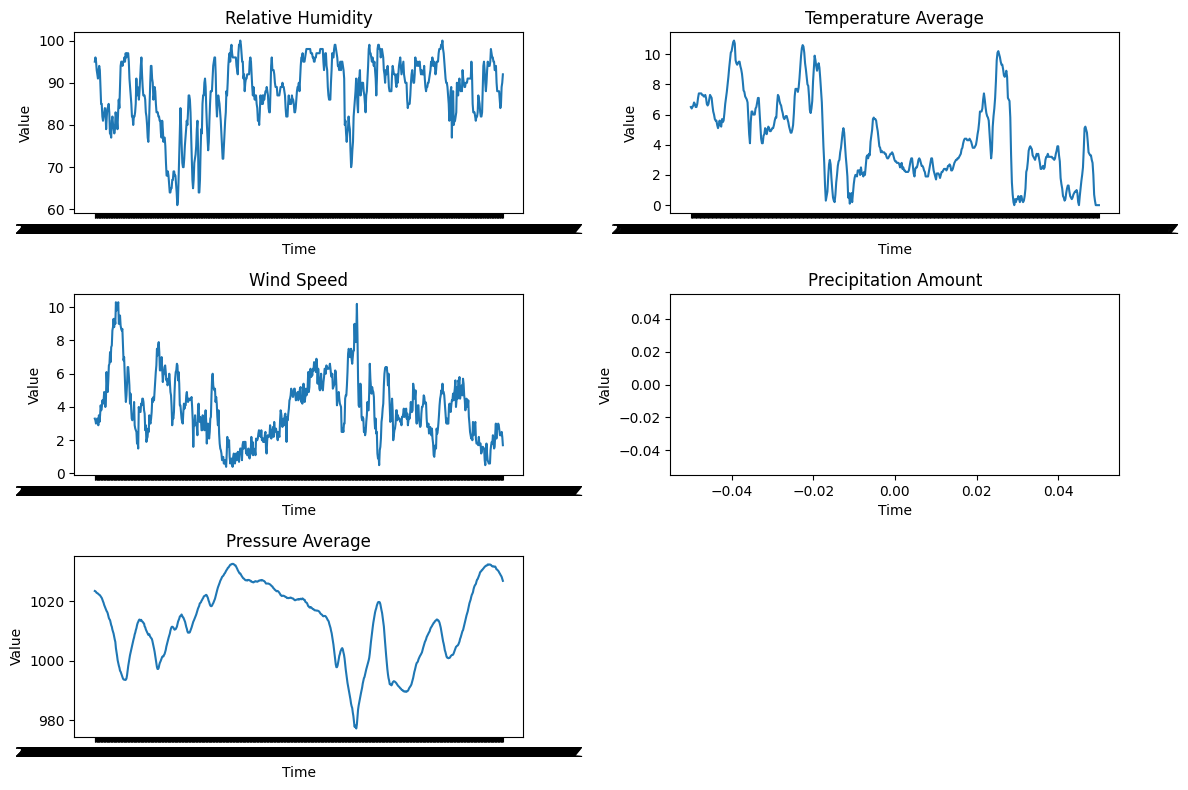

In [22]:
# Plot each parameter
plt.figure(figsize=(12, 8))
for i, param in enumerate(parameters, 1):
    plt.subplot(3, 2, i)
    plt.plot(filtered_df[filtered_df['ParameterName'] == param]['Time'], filtered_df[filtered_df['ParameterName'] == param]['ParameterValue'])
    plt.title(parameter_labels[i-1])
    plt.xlabel('Time')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [23]:
df.isnull()

,Time,ParameterName,ParameterValue
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
8359,False,False,False
8360,False,False,True
8361,False,False,True
8362,False,False,False


In [24]:
df.isnull().sum()

Time                 0
ParameterName        0
ParameterValue    2135
dtype: int64